In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [17]:
#df_folder = '/Users/ayesh/Downloads/pull/complete_data/usable/'
df_folder = '/Users/ayesh/Downloads/right_thresh/1/complete_data/usable/' ## AB3 at 66%
 
#path = '/Users/ayesh/Desktop/Fearmap_data/rotation_project/data/'
 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []

for a in behav_files:
    if a[-4:] == ".csv":
        csv_list.append(df_folder + a)

In [18]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_AC_neu = []
avg_ABfinal_neu = []
avg_BCfinal_neu = []

avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_AC_emo = []
avg_ABfinal_emo = []
avg_BCfinal_emo = []

for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BC_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ACobjectAimage = df.testAC_objectA_image
    ABfinal_trialtype = df.final1_face_image
    BCfinal_trialtype = df.final2_face_image
    
    AB3_objecttype = df.test3_objectA_image
    BC_objecttype = df.testBC_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_ACtrials = []
    fear_finalABtrials = []
    fear_finalBCtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_ACtrials = []
    neut_finalABtrials = []
    neut_finalBCtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_ACcorr = []
    f_finalABcorr = []
    f_finalBCcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_ACcorr = []
    n_finalABcorr = []
    n_finalBCcorr = []
            
    for index, row in df.iterrows():
        valence3 = AB3_trialtype[index]
        valenceBC = BC_trialtype[index]
        
        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3corr.append(AB3_objecttype[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3corr.append(AB3_objecttype[index])
        ######################################################################

        if np.isnan(BC_trialresp[index]) == False:
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    f_BCcorr.append(BC_objecttype[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BC_trialresp_rt[index])
                if BCcorr[index] == 1:
                    n_BCcorr.append(BC_objecttype[index])
    ##############################################################################
    ## THE AC TEST!! 
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced and ACobjectcue[index] in f_BCcorr and ACobjectAimage[index] in f_AB3corr:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced and ACobjectcue[index] in n_BCcorr and ACobjectAimage[index] in n_AB3corr:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = np.mean(f_ACcorr)
        prop_correctAC_neut = np.mean(n_ACcorr)
    except:
        pass

    subid.append(participant_name)

    avg_AC_neu.append(prop_correctAC_neut)
    avg_AC_emo.append(prop_correctAC_emo)

In [19]:
avg_AC_emo

[1.691883636363636,
 1.79298375,
 3.5916699999999997,
 1.3039507142857143,
 2.2132758333333338,
 1.79433,
 1.3649346153846151,
 2.901241666666667,
 3.24421,
 2.0598753333333333,
 0.5570712499999999,
 1.2116770000000001,
 0.9343625,
 1.8150650000000002,
 1.6030075,
 0.8835408333333333,
 2.5666696875,
 1.7109725000000002,
 1.7978,
 1.4931635714285716,
 2.2080525,
 2.3341791666666665,
 1.8925128571428576,
 1.7839755555555554,
 2.6558,
 0.862715,
 2.6321855555555556,
 1.6002549999999998,
 1.2553476470588234,
 2.1865,
 1.9076183333333334,
 1.2442725,
 1.3626684615384617]

In [20]:
cntrl_df = pd.DataFrame(list(zip(subid, avg_AC_neu, avg_AC_emo)), 
                     columns = ['participant', 'Avg AC', 'Avg AC_emo'])

cntrl_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcAB3BC_rt.csv', index = False, header = True)

cntrl_df

participant    Avg AC  Avg AC_emo
0   A0017268R9SKD8U2Y3F  1.675885    1.691884
1        A12HWPFXQPITHD  2.353293    1.792984
2        A14WLAP6TCEKO0  1.936070    3.591670
3        A16G6PPH1INQL8  1.545959    1.303951
4        A1C5SQZ045W0L5  2.228687    2.213276
5        A1IFIK8J49WBER  1.677959    1.794330
6        A2AZYU1CT24O0K  1.415456    1.364935
7        A2F1AA15HG0FRU  2.561110    2.901242
8        A2RVFMCKSSEHDV  3.074245    3.244210
9        A2UOSEPGNUITM8  1.986773    2.059875
10       A2Y0WNHMT4PZ4C  1.122780    0.557071
11       A2ZDEERVRN5AMC  1.374347    1.211677
12       A3F5Z5S2AHMN2O  3.050235    0.934362
13       A3G5IPGLH1IIZN  1.376089    1.815065
14       A3O0QZQ4V2IXT7  1.506147    1.603007
15       A3RQN5RZD1N2KP  1.010795    0.883541
16        A9692Y27LBXT9  1.566327    2.566670
17        AA4O2W236E3FW  1.697797    1.710973
18        AFRJKS3Z3H4CA  2.053643    1.797800
19        AHYTT3T8W9Y9Y  1.649407    1.493164
20         ANFWGSQ8BQRZ  1.737537    2.208052
21        AW5O1RK3W60FC  2.524949    2.334179
22        AZNIEFUIVB2H0  2.026425    1.892513
23        AZU9D7YLCTAYV  1.364912    1.783976
24       A2PUL3ZDXOW0VZ  1.744569    2.655800
25       A11TPUPFP2S4MK  2.708880    0.862715
26       A2N913YUJWD8BT  1.293743    2.632186
27       A3EHDY67QENKPT  1.692566    1.600255
28       A3JTDNRJYVCGQD  0.989932    1.255348
29       A38I0E8UK53ME5  1.960111    2.186500
30       A1F6MWP9A0XLJQ  2.021178    1.907618
31       A2UYZFH5VT5R3H  3.073960    1.244272
32        AHPOOKYE7V04D  1.514981    1.362668

In [21]:
cntrl_df2 = pd.melt(cntrl_df, id_vars=['participant'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
cntrl_df2



participant   condition  Total_acc
0   A0017268R9SKD8U2Y3F      Avg AC   1.675885
1        A12HWPFXQPITHD      Avg AC   2.353293
2        A14WLAP6TCEKO0      Avg AC   1.936070
3        A16G6PPH1INQL8      Avg AC   1.545959
4        A1C5SQZ045W0L5      Avg AC   2.228687
..                  ...         ...        ...
61       A3JTDNRJYVCGQD  Avg AC_emo   1.255348
62       A38I0E8UK53ME5  Avg AC_emo   2.186500
63       A1F6MWP9A0XLJQ  Avg AC_emo   1.907618
64       A2UYZFH5VT5R3H  Avg AC_emo   1.244272
65        AHPOOKYE7V04D  Avg AC_emo   1.362668

[66 rows x 3 columns]

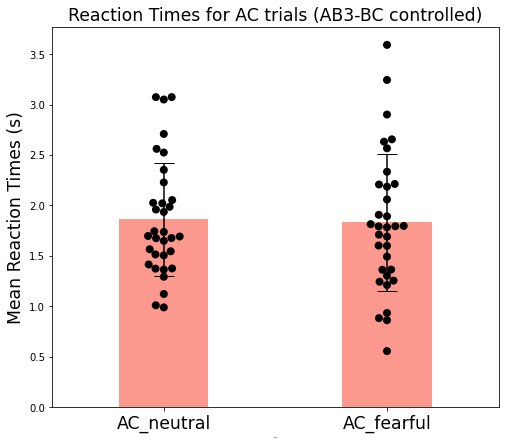

In [22]:
neuAC_mean = np.mean(avg_AC_neu)
emoAC_mean = np.mean(avg_AC_emo)


neuAC_std = np.std(avg_AC_neu)
emoAC_std = np.std(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df2, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='salmon',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Times (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Reaction Times for AC trials (AB3-BC controlled)', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

# ABfinal and BC final controlled


In [30]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_AC_neu = []
avg_ABfinal_neu = []
avg_BCfinal_neu = []

avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_AC_emo = []
avg_ABfinal_emo = []
avg_BCfinal_emo = []

for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    finalABcorr = df.key_resp_30_corr
    finalBCcorr = df.key_resp_31_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    finalAB_trialresp = df.key_resp_30_keys
    finalBC_trialresp = df.key_resp_31_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BC_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    finalAB_trialresp_rt = df.key_resp_30_rt
    finalBC_trialresp_rt = df.key_resp_31_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BC_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ACobjectAimage = df.testAC_objectA_image
    ABfinal_trialtype = df.final1_face_image
    BCfinal_trialtype = df.final2_face_image
    
    finalAB_objecttype = df.final1_objectA_image
    finalBC_objecttype = df.final2_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    t_finalABtrials = []
    t_finalBCtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_ACtrials = []
    fear_finalABtrials = []
    fear_finalBCtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_ACtrials = []
    neut_finalABtrials = []
    neut_finalBCtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_ACcorr = []
    f_finalABcorr = []
    f_finalBCcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_ACcorr = []
    n_finalABcorr = []
    n_finalBCcorr = []
            
    for index, row in df.iterrows():
        valence3 = ABfinal_trialtype[index]
        valenceBC = BCfinal_trialtype[index]
        
           ######################################################################

        if np.isnan(finalBC_trialresp[index]) == False:
            if valenceBC[2:6] == 'fear':
                fear_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    f_finalBCcorr.append(finalBC_objecttype[index])
            elif valenceBC[2:6] == 'neut':
                neut_finalBCtrials.append(finalBC_trialresp_rt[index])
                if finalBCcorr[index] == 1:
                    n_finalBCcorr.append(finalBC_objecttype[index])
        
        ######################################################################
 
        if np.isnan(finalAB_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    f_finalABcorr.append(finalAB_objecttype[index])
            elif valence3[2:6] == 'neut':
                neut_finalABtrials.append(finalAB_trialresp_rt[index])
                if finalABcorr[index] == 1:
                    n_finalABcorr.append(finalAB_objecttype[index])
     
    ##############################################################################
    ## THE AC TEST!! 
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced and ACobjectcue[index] in f_finalBCcorr and ACobjectAimage[index] in f_finalABcorr:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced and ACobjectcue[index] in n_finalBCcorr and ACobjectAimage[index] in n_finalABcorr:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = np.mean(f_ACcorr)
        prop_correctAC_neut = np.mean(n_ACcorr)
    except:
        pass

    subid.append(participant_name)

    
    avg_AC_neu.append(prop_correctAC_neut)
    avg_AC_emo.append(prop_correctAC_emo)

In [31]:
cntrl_df3 = pd.DataFrame(list(zip(subid, avg_AC_neu, avg_AC_emo)), 
                     columns = ['participant', 'Avg AC', 'Avg AC_emo'])

cntrl_df3.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/srcFinalABBC_rt.csv', index = False, header = True)
cntrl_df3

participant    Avg AC  Avg AC_emo
0   A0017268R9SKD8U2Y3F  1.737924    1.691553
1        A12HWPFXQPITHD  1.117005    1.655966
2        A16G6PPH1INQL8  1.678765    1.071028
3        A1C5SQZ045W0L5  2.151013    2.399869
4        A1IFIK8J49WBER  1.714699    2.056731
5        A2AZYU1CT24O0K  1.497519    1.536943
6        A2F1AA15HG0FRU  1.857084    3.077778
7        A2RVFMCKSSEHDV  3.562945    1.849195
8        A2UOSEPGNUITM8  1.991543    1.921517
9        A2Y0WNHMT4PZ4C  1.140182    0.615962
10       A2ZDEERVRN5AMC  1.414427    1.293218
11       A3G5IPGLH1IIZN  1.487967    1.675150
12       A3O0QZQ4V2IXT7  1.508043    1.942200
13       A3RQN5RZD1N2KP  0.914633    0.958693
14        A9692Y27LBXT9  1.663522    2.300529
15        AA4O2W236E3FW  1.603579    1.783925
16        AFRJKS3Z3H4CA  2.149200    1.601250
17        AHYTT3T8W9Y9Y  1.586763    1.658243
18         ANFWGSQ8BQRZ  1.759408    2.158699
19        AW5O1RK3W60FC  2.164303    2.014283
20        AZNIEFUIVB2H0  1.983806    1.877034
21        AZU9D7YLCTAYV  1.424068    1.525991
22       A2PUL3ZDXOW0VZ  1.976685    2.090404
23       A11TPUPFP2S4MK  1.954047    1.518563
24       A2N913YUJWD8BT  1.414344    3.044577
25       A3EHDY67QENKPT  1.944837    1.393706
26       A3JTDNRJYVCGQD  0.978822    1.360490
27       A38I0E8UK53ME5  2.018429    2.320000
28       A1F6MWP9A0XLJQ  1.796568    2.094348
29        AHPOOKYE7V04D  1.649754    1.107070

In [21]:
cntrl_df4 = pd.melt(cntrl_df3, id_vars=['participant'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
cntrl_df4

participant   condition  Total_acc
0   A0017268R9SKD8U2Y3F      Avg AC   1.737924
1        A12HWPFXQPITHD      Avg AC   1.117005
2        A16G6PPH1INQL8      Avg AC   1.678765
3        A1C5SQZ045W0L5      Avg AC   2.151013
4        A1IFIK8J49WBER      Avg AC   1.714699
5        A2AZYU1CT24O0K      Avg AC   1.497519
6        A2F1AA15HG0FRU      Avg AC   1.857084
7        A2RVFMCKSSEHDV      Avg AC   3.562945
8        A2UOSEPGNUITM8      Avg AC   1.991543
9        A2Y0WNHMT4PZ4C      Avg AC   1.140182
10       A2ZDEERVRN5AMC      Avg AC   1.414427
11       A3G5IPGLH1IIZN      Avg AC   1.487967
12       A3O0QZQ4V2IXT7      Avg AC   1.508043
13       A3RQN5RZD1N2KP      Avg AC   0.914633
14        A9692Y27LBXT9      Avg AC   1.663522
15        AA4O2W236E3FW      Avg AC   1.603579
16        AFRJKS3Z3H4CA      Avg AC   2.149200
17        AHYTT3T8W9Y9Y      Avg AC   1.586763
18         ANFWGSQ8BQRZ      Avg AC   1.759408
19        AW5O1RK3W60FC      Avg AC   2.164303
20        AZNIEFUIVB2H0      Avg AC   1.983806
21        AZU9D7YLCTAYV      Avg AC   1.424068
22       A2PUL3ZDXOW0VZ      Avg AC   1.976685
23       A11TPUPFP2S4MK      Avg AC   1.954047
24       A2N913YUJWD8BT      Avg AC   1.414344
25       A3EHDY67QENKPT      Avg AC   1.944837
26       A3JTDNRJYVCGQD      Avg AC   0.978822
27       A38I0E8UK53ME5      Avg AC   2.018429
28       A1F6MWP9A0XLJQ      Avg AC   1.796568
29        AHPOOKYE7V04D      Avg AC   1.649754
30  A0017268R9SKD8U2Y3F  Avg AC_emo   1.691553
31       A12HWPFXQPITHD  Avg AC_emo   1.655966
32       A16G6PPH1INQL8  Avg AC_emo   1.071028
33       A1C5SQZ045W0L5  Avg AC_emo   2.399869
34       A1IFIK8J49WBER  Avg AC_emo   2.056731
35       A2AZYU1CT24O0K  Avg AC_emo   1.536943
36       A2F1AA15HG0FRU  Avg AC_emo   3.077778
37       A2RVFMCKSSEHDV  Avg AC_emo   1.849195
38       A2UOSEPGNUITM8  Avg AC_emo   1.921517
39       A2Y0WNHMT4PZ4C  Avg AC_emo   0.615962
40       A2ZDEERVRN5AMC  Avg AC_emo   1.293218
41       A3G5IPGLH1IIZN  Avg AC_emo   1.675150
42       A3O0QZQ4V2IXT7  Avg AC_emo   1.942200
43       A3RQN5RZD1N2KP  Avg AC_emo   0.958693
44        A9692Y27LBXT9  Avg AC_emo   2.300529
45        AA4O2W236E3FW  Avg AC_emo   1.783925
46        AFRJKS3Z3H4CA  Avg AC_emo   1.601250
47        AHYTT3T8W9Y9Y  Avg AC_emo   1.658243
48         ANFWGSQ8BQRZ  Avg AC_emo   2.158699
49        AW5O1RK3W60FC  Avg AC_emo   2.014283
50        AZNIEFUIVB2H0  Avg AC_emo   1.877034
51        AZU9D7YLCTAYV  Avg AC_emo   1.525991
52       A2PUL3ZDXOW0VZ  Avg AC_emo   2.090404
53       A11TPUPFP2S4MK  Avg AC_emo   1.518563
54       A2N913YUJWD8BT  Avg AC_emo   3.044577
55       A3EHDY67QENKPT  Avg AC_emo   1.393706
56       A3JTDNRJYVCGQD  Avg AC_emo   1.360490
57       A38I0E8UK53ME5  Avg AC_emo   2.320000
58       A1F6MWP9A0XLJQ  Avg AC_emo   2.094348
59        AHPOOKYE7V04D  Avg AC_emo   1.107070

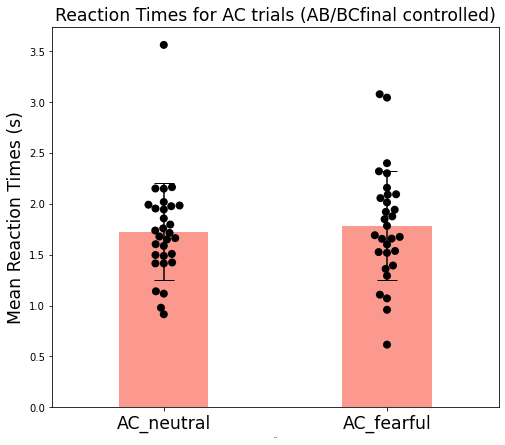

In [22]:
neuAC_mean = np.mean(avg_AC_neu)
emoAC_mean = np.mean(avg_AC_emo)


neuAC_std = np.std(avg_AC_neu)
emoAC_std = np.std(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df4, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='salmon',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Times (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Reaction Times for AC trials (AB/BCfinal controlled)', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'